In [1]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score, f1_score , recall_score , precision_score, confusion_matrix

%matplotlib inline

In [2]:
wine_df = pd.read_csv('winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


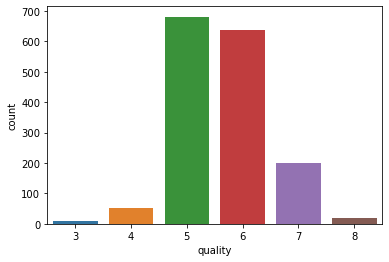

In [5]:
sns.countplot(wine_df['quality'])

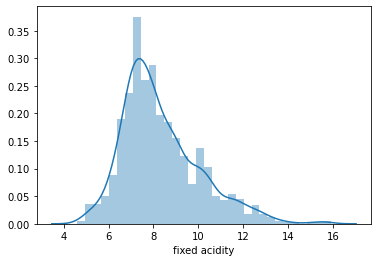

In [6]:
sns.distplot(wine_df['fixed acidity'])

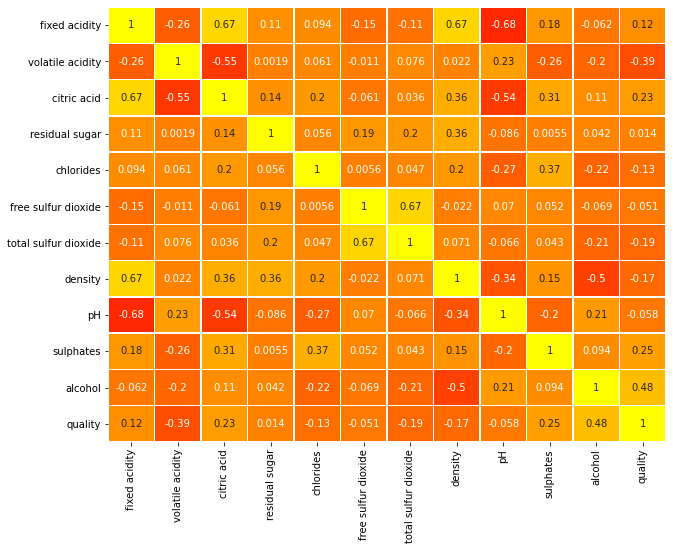

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr() , annot = True , linewidths = .5,center =0 , cbar = False,
           cmap = 'autumn')


In [8]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
wine_df['quality'] = wine_df['quality'].replace(8,7)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)

wine_df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(wine_df.drop('quality' , axis = 1) , wine_df['quality'] , 
                                                test_size = .25 , random_state = 22)

X_train.shape , X_test.shape , y_train.shape,y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [11]:
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model_gini.score(X_train,y_train)

1.0

In [13]:
model_gini.score(X_test,y_test)

0.6525

In [14]:
clf_pruned = DecisionTreeClassifier(criterion = 'gini' , random_state = 100 , 
                                   min_samples_split= 36 , min_samples_leaf= 12)

clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=12, min_samples_split=36,
                       random_state=100)

In [15]:
clf_pruned.score(X_train, y_train)

0.737281067556297

In [16]:
clf_pruned.score(X_test, y_test)

0.6075

In [17]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize = False)

feat_imp_dict = dict(zip(X_train.columns, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict , orient='index')
feat_imp.sort_values(by = 0 , ascending  = False)

,0
alcohol,0.329667
sulphates,0.167872
total sulfur dioxide,0.143611
volatile acidity,0.107510
density,0.090107
chlorides,0.061205
free sulfur dioxide,0.041519
residual sugar,0.021532
citric acid,0.017846
fixed acidity,0.013296
